# Table of contents

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # import the k-means algorithm from scikit-learn
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\opetr\Desktop\PPP Loans'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '2. Data', '2. Prepared Data', 'clean_data.csv'), index_col = False)

In [5]:
df.shape

(968518, 23)

In [6]:
df.head()

,Unnamed: 0,LoanNumber,DateApproved,ProcessingMethod,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,...,ServicingLenderName,RuralUrbanIndicator,BusinessAgeDescription,JobsReported,BusinessType,OriginatingLenderLocationID,OriginatingLender,NonProfit,ForgivenessAmount,ForgivenessDate
0,13,5502308207,2020-08-08,PPP,ANCHORAGE,AK,99503-7146,2021-07-22,Paid in Full,60,...,Northrim Bank,U,Existing or more than 2 years old,385.0,Limited Liability Company(LLC),116975,Northrim Bank,NaN,9615884.57,2021-06-11
1,14,6110847106,2020-04-14,PPP,BARROW,AK,99723,2021-08-21,Paid in Full,24,...,"National Cooperative Bank, National Association",R,Existing or more than 2 years old,295.0,Non-Profit Organization,89628,"National Cooperative Bank, National Association",Y,7761324.81,2021-07-13
2,15,4539098204,2020-08-06,PPP,Anchorage,AK,99502-1130,NaN,Exemption 4,60,...,Idaho First Bank,U,Existing or more than 2 years old,500.0,Corporation,436276,Idaho First Bank,NaN,4891430.37,2022-06-22
3,16,5120868804,2021-04-17,PPP,Anchorage,AK,99518-1105,2022-10-06,Paid in Full,60,...,First National Bank Alaska,U,Existing or more than 2 years old,500.0,501(c)3 – Non Profit,3386,First National Bank Alaska,Y,7321970.55,2022-09-13
4,17,6650277102,2020-04-14,PPP,HOMER,AK,99603,2021-06-09,Paid in Full,24,...,First National Bank Alaska,R,Existing or more than 2 years old,439.0,Corporation,3386,First National Bank Alaska,NaN,6598389.38,2021-05-18


In [7]:
df.columns

Index(['Unnamed: 0', 'LoanNumber', 'DateApproved', 'ProcessingMethod',
       'BorrowerCity', 'BorrowerState', 'BorrowerZip', 'LoanStatusDate',
       'LoanStatus', 'Term', 'InitialApprovalAmount', 'CurrentApprovalAmount',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'RuralUrbanIndicator', 'BusinessAgeDescription', 'JobsReported',
       'BusinessType', 'OriginatingLenderLocationID', 'OriginatingLender',
       'NonProfit', 'ForgivenessAmount', 'ForgivenessDate'],
      dtype='object')

In [8]:
# Permanently dropping columns
df = df.drop(columns = ['Unnamed: 0', 'LoanNumber', 'DateApproved', 'ProcessingMethod', 'BorrowerCity', 'BorrowerState', 
                        'BorrowerZip', 'LoanStatusDate', 'LoanStatus', 'ServicingLenderName', 'RuralUrbanIndicator', 
                        'BusinessAgeDescription','BusinessType','OriginatingLender', 'NonProfit', 'ForgivenessDate'])

In [9]:
# Check for missing values

df.isnull().sum()

Term                               0
InitialApprovalAmount              0
CurrentApprovalAmount              0
ServicingLenderLocationID          0
JobsReported                       1
OriginatingLenderLocationID        0
ForgivenessAmount              29646
dtype: int64

In [10]:
# Drop missing values from the JobsReported and ForgivenessAmount columns

df.dropna(subset = ['JobsReported', 'ForgivenessAmount'], inplace = True)

### 2. The elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [12]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option

score

[-1.5503876721296722e+18,
 -6.749525537371752e+17,
 -3.403206243984915e+17,
 -2.2749808019860595e+17,
 -1.5436221909836806e+17,
 -1.2416411627174576e+17,
 -1.0019781406246034e+17,
 -8.07852709723733e+16,
 -6.868776056815779e+16]

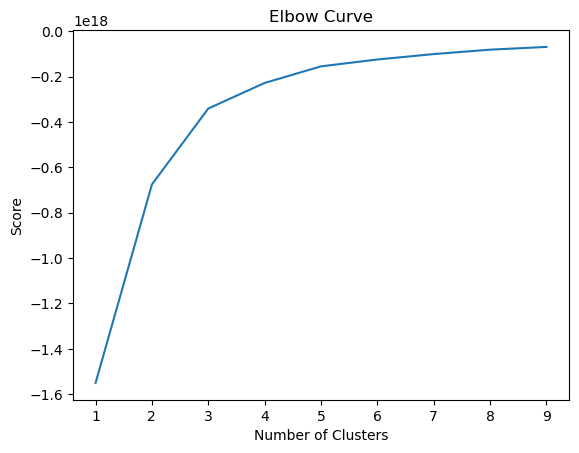

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  The curve straightens out after 5 on the x-axis. This means that the optimal count for your clusters is five.

### 3. k-means clustering

In [14]:
# Create the k-means object

kmeans = KMeans(n_clusters = 5) 

In [15]:
# Fit the k-means object to the data

kmeans.fit(df)

KMeans(n_clusters=5)

In [16]:
df['clusters'] = kmeans.fit_predict(df)

In [17]:
df.head()

,Term,InitialApprovalAmount,CurrentApprovalAmount,ServicingLenderLocationID,JobsReported,OriginatingLenderLocationID,ForgivenessAmount,clusters
0,60,9571397.00,9538531.00,116975,385.0,116975,9615884.57,1
1,24,7666768.00,7666768.00,89628,295.0,89628,7761324.81,1
2,60,7398947.89,7398947.89,436276,500.0,436276,4891430.37,1
3,60,7223025.00,7223025.00,3386,500.0,3386,7321970.55,1
4,24,6528631.40,6528631.40,3386,439.0,3386,6598389.38,1


In [18]:
df['clusters'].value_counts()

0    706893
3    162903
2     53675
4     12315
1      3085
Name: clusters, dtype: int64

In [19]:
# Plot the clusters for two variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['ForgivenessAmount'], y=df['Term'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ForgivenessAmount') # Label x-axis.
plt.ylabel('Term') # Label y-axis.
plt.show()

KeyboardInterrupt: 

In [ ]:
# Plot the clusters for two variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['ForgivenessAmount'], y=df['JobsReported'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ForgivenessAmount') # Label x-axis.
plt.ylabel('JobsReported') # Label y-axis.
plt.show()

In [ ]:
# Plot the clusters for two variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['OriginatingLenderLocationID'], y=df['ForgivenessAmount'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('OriginatingLenderLocationID') # Label x-axis.
plt.ylabel('ForgivenessAmount') # Label y-axis.
plt.show()

### The clusters don't offer any insights into the relationship of these variables. It seems like the loan amount granted to business is higher when they have more employees, which could be due to its size and cost of running business beig higher. The highest loan terms seem have lower forgiveness amounts.

### After this analysis we can conclude that further exploration into these variables is needed in order to determine what factor or combination of factors influences the loan amount.

In [20]:
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'pink'
df.loc[df['clusters'] == 1, 'cluster'] = 'light pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'tan'

In [21]:
# Change to my variables
df.groupby('cluster').agg({'ForgivenessAmount':['mean', 'median'], 
                         'JobsReported':['mean', 'median'], 
                         'Term':['mean', 'median']})

ForgivenessAmount             JobsReported              Term  \
                         mean      median         mean median       mean   
cluster                                                                    
dark purple      3.907310e+06  3738652.67   303.174665  284.0  26.426715   
light pink       7.893418e+06  7585000.00   430.376013  481.0  29.305997   
pink             1.843392e+06  1795238.20   167.013209  142.0  35.103493   
purple           8.203913e+05   770802.39    79.109145   64.0  35.549879   
tan              2.704078e+05   239930.97    30.917880   24.0  36.772785   

                    
            median  
cluster             
dark purple   24.0  
light pink    24.0  
pink          24.0  
purple        24.0  
tan           24.0

In [22]:
# Export new dataframe

df.to_csv(os.path.join(path, '2. Data', '2. Prepared Data', 'clusters.csv'))